In [1]:
#standard imports and transforming our csv into a dataframe

import pandas as pd
import numpy as np

powerlifting_df = pd.read_csv('openpowerlifting.csv')

powerlifting_df

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,NaN,Elite,113.58,125,NaN,NaN,NaN,NaN,NaN,347.50,347.50,2,202.60
386410,8481,Justin Zottl,M,Multi-ply,NaN,Elite,119.02,125,NaN,NaN,NaN,NaN,NaN,322.50,322.50,3,185.77
386411,8481,Jake Anderson,M,Multi-ply,NaN,Elite,120.29,125,NaN,NaN,NaN,NaN,NaN,367.50,367.50,1,211.17
386412,8481,Jeff Bumanglag,M,Multi-ply,NaN,Elite,126.73,140,NaN,NaN,NaN,NaN,NaN,320.00,320.00,3,181.85


In [2]:
#Looking at our dataframe information

powerlifting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        370571 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  object 
 8   Squat4Kg        1243 non-null    float64
 9   BestSquatKg     298071 non-null  float64
 10  Bench4Kg        1962 non-null    float64
 11  BestBenchKg     356364 non-null  float64
 12  Deadlift4Kg     2800 non-null    float64
 13  BestDeadliftKg  317847 non-null  float64
 14  TotalKg         363237 non-null  float64
 15  Place           385322 non-null  object 
 16  Wilks           362194 non-null  float64
dtypes: float64

In [3]:
#looking at the null values for the dataset

powerlifting_df.isnull().sum()

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division           15843
BodyweightKg        2402
WeightClassKg       3812
Squat4Kg          385171
BestSquatKg        88343
Bench4Kg          384452
BestBenchKg        30050
Deadlift4Kg       383614
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
dtype: int64

In [4]:
#There is a huge amount of data missing from 3 columns, so I make the decision to eliminate those columns
#The columns names are not the best, I will at least make them all lower case for my preferance

pl_df_copy = powerlifting_df.drop(['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg'], axis = 1)
pl_df_copy.columns = pl_df_copy.columns.str.lower()
pl_df_copy

,meetid,name,sex,equipment,age,division,bodyweightkg,weightclasskg,bestsquatkg,bestbenchkg,bestdeadliftkg,totalkg,place,wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,95.25,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,NaN,Elite,113.58,125,NaN,NaN,347.50,347.50,2,202.60
386410,8481,Justin Zottl,M,Multi-ply,NaN,Elite,119.02,125,NaN,NaN,322.50,322.50,3,185.77
386411,8481,Jake Anderson,M,Multi-ply,NaN,Elite,120.29,125,NaN,NaN,367.50,367.50,1,211.17
386412,8481,Jeff Bumanglag,M,Multi-ply,NaN,Elite,126.73,140,NaN,NaN,320.00,320.00,3,181.85


In [5]:
#Our target is also missing values, and I have made the decision to impute values based on the gender column, but need to investigate which method to use

male_median = pl_df_copy[pl_df_copy['sex'] == 'M']['wilks'].median()
female_median = pl_df_copy[pl_df_copy['sex'] == 'F']['wilks'].median()
male_average = pl_df_copy[pl_df_copy['sex'] == 'M']['wilks'].mean()
female_average = pl_df_copy[pl_df_copy['sex'] == 'F']['wilks'].mean()

print('Our male median is',male_median, 'and our male average is', male_average)
print('Our female median is',female_median, 'and our female average is', female_average)   

Our male median is 327.17 and our male average is 305.3876743775449
Our female median is 299.15 and our female average is 286.85644118576414


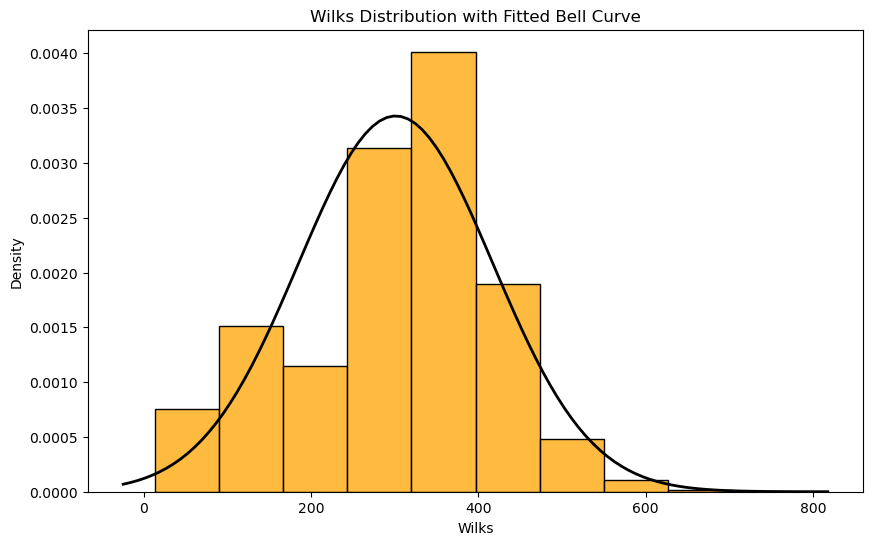

In [6]:
#imports for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

#extract the wilks data for futher examination
wilks_data = pl_df_copy['wilks']

#create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(wilks_data, kde=False, bins=10, color='orange', stat='density')

#create mean and standard deviation variables
mean = np.mean(wilks_data)
std_dev = np.std(wilks_data)

#create a range of values for plotting the bell curve (normal distribution)
xmin, xmax = plt.xlim()  # Get the x-axis limits from the plot
x = np.linspace(xmin, xmax, 100)

#Compute the normal distribution for the bell curve
p = norm.pdf(x, mean, std_dev)

#Plot the bell curve on top of the histogram
plt.plot(x, p, 'k', linewidth=2)

#Add labels and title for clarity
plt.title('Wilks Distribution with Fitted Bell Curve')
plt.xlabel('Wilks')
plt.ylabel('Density')

# Show the plot
plt.show()

In [7]:
#I have decided to use the median for imputation, because I am going to keep outliers in my model
for index, row in pl_df_copy.iterrows():
    if pd.isna(row['wilks']):  
        if row['sex'] == 'M':  
            pl_df_copy.at[index, 'wilks'] = male_median
        elif row['sex'] == 'F':  
            pl_df_copy.at[index, 'wilks'] = female_median

In [8]:
#We now should have no missing values in what will be our target column
pl_df_copy['wilks'].isna().sum()

0

In [9]:
#going to take numeric columns from the dataframe from and run correlation on them. Will then create a heatmap for them.

num_attributes = pl_df_copy[['bodyweightkg', 'bestsquatkg', 'bestbenchkg', 'bestdeadliftkg', 'totalkg', 'wilks', 'age']]

corr_matrix = num_attributes.corr()

corr_matrix["wilks"].sort_values(ascending=False)

wilks             1.000000
totalkg           0.875926
bestsquatkg       0.720721
bestdeadliftkg    0.587285
bestbenchkg       0.233412
bodyweightkg      0.034953
age              -0.241076
Name: wilks, dtype: float64

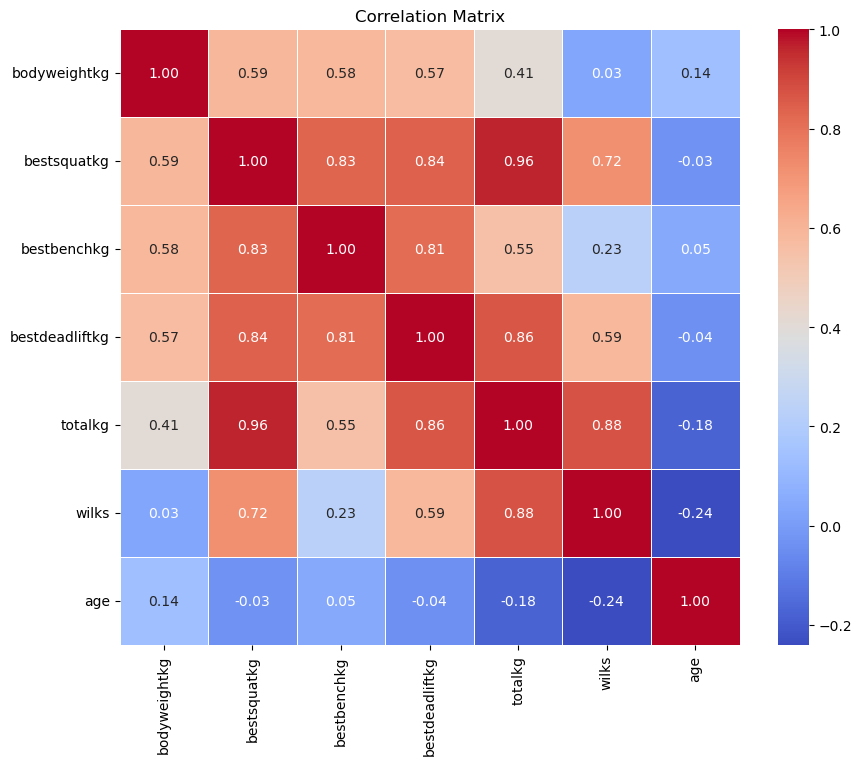

In [10]:
#heatmap for the selected numerical values

plt.figure(figsize=(10, 8))  # Adjust figsize as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

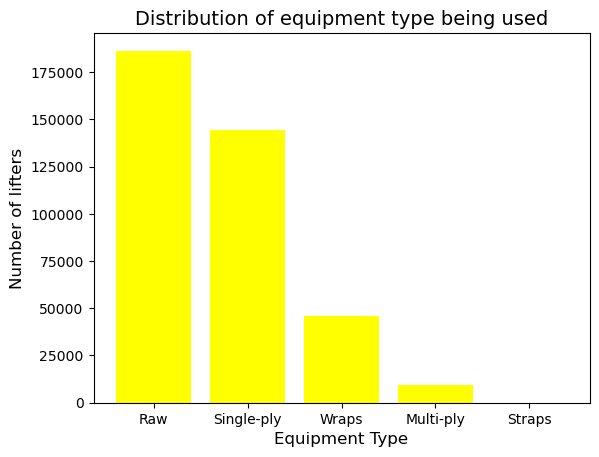

------------------------------------------------------------------------------------------------------------------------------------------------------
equipment
Raw           186317
Single-ply    144406
Wraps          46108
Multi-ply       9576
Straps             7
Name: count, dtype: int64


In [11]:
ordinal_count = pl_df_copy['equipment'].value_counts()

plt.bar(ordinal_count.index, ordinal_count, color='Yellow')

# Add a title and labels
plt.title('Distribution of equipment type being used', fontsize=14)
plt.xlabel('Equipment Type', fontsize=12)
plt.ylabel('Number of lifters', fontsize=12)

# Show the plot
plt.show()



print('------------------------------------------------------------------------------------------------------------------------------------------------------')
#Even though the visualization shows what looks like nothing for the straps equipment, there is in fact 7 entries
print(pl_df_copy['equipment'].value_counts())

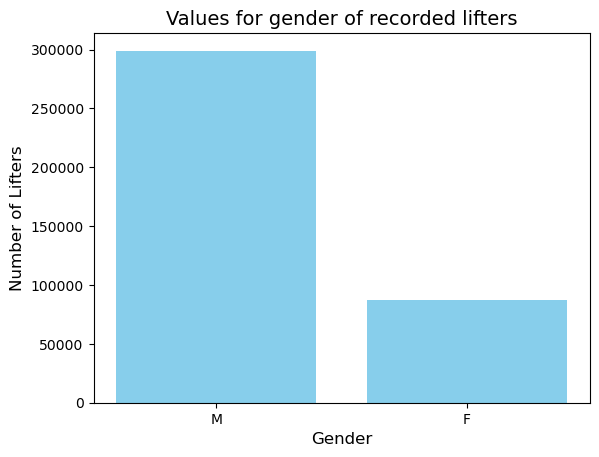

In [12]:
#Get a visualization of the breakdown of our sex column

gender_counts = pl_df_copy['sex'].value_counts()

plt.bar(gender_counts.index, gender_counts, color='skyblue')

# Add a title and labels
plt.title('Values for gender of recorded lifters', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Lifters', fontsize=12)

# Show the plot
plt.show()

In [13]:
#Create our features, target, training, and test sets

from sklearn.model_selection import train_test_split

target = pl_df_copy['wilks']
features = pl_df_copy.drop(['wilks', 'meetid', 'name', 'division', 'place', 'weightclasskg'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=42)

In [14]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select numeric and categorical columns for preprocessing
num_columns = ['age', 'bodyweightkg', 'bestsquatkg', 'bestbenchkg', 'bestdeadliftkg', 'totalkg']
cat_columns = ['equipment', 'sex']

# Create the numeric pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Create the categorical pipeline
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode categorical features, drop first category to avoid dummy variable trap
])

# Create the column transformer for preprocessing
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_columns),  # Apply numeric pipeline to numeric columns
        ('cat', categorical_pipeline, cat_columns)  # Apply categorical pipeline to categorical columns
    ])

# Apply the transformations to X_train (without y_train)
X_train_prepared = preprocessing.fit_transform(X_train)

# If needed, check the shape of the transformed data
print(f"Transformed X_train shape: {X_train_prepared.shape}")

Transformed X_train shape: (309131, 11)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#instantiate a linear model, fit it with our preprocessed x train data and our y train data
lin_reg = LinearRegression() 
lin_reg.fit(X_train_prepared, y_train)

#get rmse scores for our linear model
cv_scores_lin_model = -cross_val_score(lin_reg, X_train_prepared, y_train,
                         scoring="neg_root_mean_squared_error", cv=10)

pd.Series(cv_scores_lin_model).describe()

count    10.000000
mean     29.863013
std       0.345832
min      29.205773
25%      29.672552
50%      29.910805
75%      30.098127
max      30.334024
dtype: float64

In [16]:
#instatiate a Random Forest Regression Model, and fit the model with our preprocessed x train data and our y train data

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=3)

rf_model.fit(X_train_prepared, y_train)

#get my rmse scores
cv_rmse_scores_rf = -cross_val_score(rf_model,X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv=3)

pd.Series(cv_rmse_scores_rf).describe()

count     3.000000
mean     50.729259
std       0.623393
min      50.291678
25%      50.372371
50%      50.453064
75%      50.948050
max      51.443035
dtype: float64

In [17]:
#create more random forest models
rf_1 = RandomForestRegressor(n_estimators=100, max_features='sqrt', max_depth=7)

rf_1.fit(X_train_prepared,y_train)

cv_rmse_rf_1 = -cross_val_score(rf_1,X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv=3)

pd.Series(cv_rmse_rf_1).describe()

count     3.000000
mean     26.056543
std       0.211455
min      25.847326
25%      25.949730
50%      26.052135
75%      26.161151
max      26.270168
dtype: float64

In [18]:
rf_2 = RandomForestRegressor(n_estimators = 150, max_features = 'sqrt', max_depth = 10)

rf_2.fit(X_train_prepared,y_train)

cv_rmse_rf_2 = -cross_val_score(rf_2, X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv=3)

pd.Series(cv_rmse_rf_2).describe()

count     3.000000
mean     16.611711
std       0.209039
min      16.463982
25%      16.492121
50%      16.520260
75%      16.685576
max      16.850892
dtype: float64

In [20]:
rf_3 = RandomForestRegressor(n_estimators = 200, max_features = 'sqrt', max_depth = 15)

rf_3.fit(X_train_prepared, y_train)

cv_rmse_rf_3 = -cross_val_score(rf_3, X_train_prepared, y_train, scoring = "neg_root_mean_squared_error", cv=3)

pd.Series(cv_rmse_rf_3).describe()

count    3.000000
mean     8.501198
std      0.080062
min      8.408840
25%      8.476336
50%      8.543831
75%      8.547376
max      8.550922
dtype: float64

In [22]:
#Transform the X_test Data
X_test_transformed = preprocessing.transform(X_test)

In [28]:
y_predictions = rf_3.predict(X_test_transformed)


from sklearn.metrics import mean_squared_error, r2_score

final_rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
r2_with_grades = r2_score(y_test, y_predictions)

In [30]:
print(f"Final RMSE: {final_rmse}")
print(f"R-squared: {r2_with_grades}")

Final RMSE: 7.955181821349989
R-squared: 0.9949992623367224


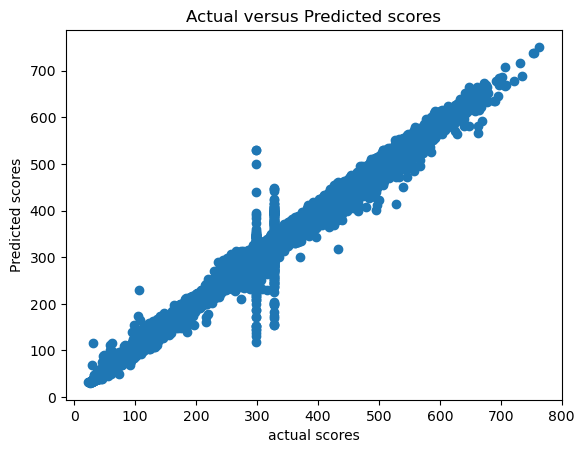

In [32]:
x_axis = y_test

y_axis = y_predictions

plt.scatter(x_axis, y_axis)
plt.xlabel('actual scores')
plt.ylabel('Predicted scores')
plt.title('Actual versus Predicted scores')
plt.show()